线性回归，最小二乘法，最优化，线性规划，求导，求积分，梯度，偏微分方程

## 一、线性归回

https://zhuanlan.zhihu.com/p/22692029

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import talib as ta
import statsmodels.api as sm
%matplotlib inline

In [2]:
# 设置图表默认大小
plt.rcParams['figure.figsize'] = 10,5

### 简单 OLS 回归

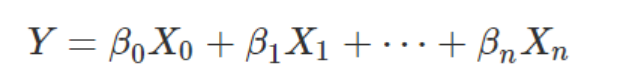

In [4]:
# 先设定数据量
nsample = 100
# 创建一个 array，这里，我们想要 x1 的值从 0 到 10 等差排列
x = np.linspace(0, 10, nsample)
x

array([0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304,
       0.40404040404040403, 0.5050505050505051, 0.6060606060606061,
       0.7070707070707071, 0.8080808080808081, 0.9090909090909091,
       1.0101010101010102, 1.1111111111111112, 1.2121212121212122,
       1.3131313131313131, 1.4141414141414141, 1.5151515151515151,
       1.6161616161616161, 1.7171717171717171, 1.8181818181818181,
       1.9191919191919191, 2.0202020202020203, 2.121212121212121,
       2.2222222222222223, 2.323232323232323, 2.4242424242424243,
       2.525252525252525, 2.6262626262626263, 2.727272727272727,
       2.8282828282828283, 2.929292929292929, 3.0303030303030303,
       3.131313131313131, 3.2323232323232323, 3.3333333333333335,
       3.4343434343434343, 3.5353535353535355, 3.6363636363636362,
       3.7373737373737375, 3.8383838383838382, 3.9393939393939394,
       4.040404040404041, 4.141414141414141, 4.242424242424242,
       4.343434343434343, 4.444444444444445, 4.545454545454545

In [19]:
# 在 array 上加入一列常项1
X = sm.add_constant(x)

In [21]:
# 设置模型里的 β0,β1，这里要设置成 1,10
beta = np.array([1, 10])

In [22]:
# 加上误差项，所以生成一个长度为k的正态分布样本
e = np.random.normal(size=nsample)

In [23]:
# 我们生成反应项 y(t)
y = np.dot(X, beta) + e

In [24]:
# 反应变量和回归变量上使用 OLS() 函数
model = sm.OLS(y,X)

In [25]:
# 获取拟合结果
results = model.fit()

In [26]:
# 取计算出的回归系数
print(results.params)

[1.1434358607111308 9.98801040595726]


In [27]:
# 回归拟合的摘要
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.356e+04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          7.40e-148
Time:                        17:28:07   Log-Likelihood:                -135.98
No. Observations:                 100   AIC:                             276.0
Df Residuals:                      98   BIC:                             281.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1434      0.189      6.050      0.0

In [29]:
# 调用拟合结果的 fittedvalues 得到拟合的 y 值
y_fitted = results.fittedvalues

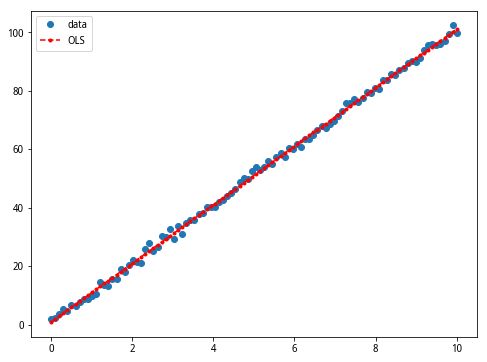

In [16]:
# 将拟合结果画出来
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

(-0.05, 2, -1, 25)

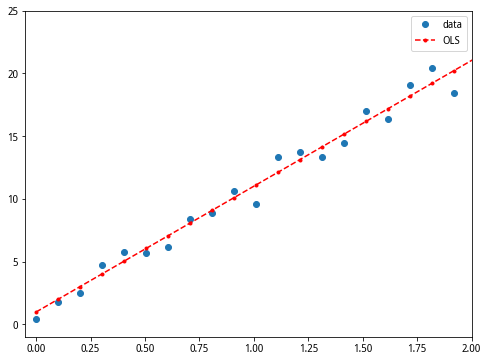

In [28]:
# 放大细节
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
ax.axis((-0.05, 2, -1, 25))

### 高次模型的回归
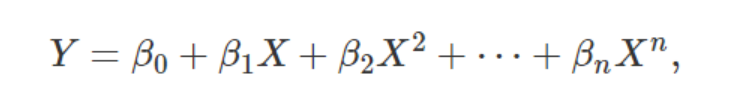

In [30]:
# 设定数据量
nsample = 100

In [35]:
# 创建一个 array，x1 的值从 0 到 10 等差排列
x = np.linspace(0, 10, nsample)

In [36]:
# 再创建一个 k×2 的 array，两列分别为 x1 和 x2。我们需要 x2 为 x1 的平方
X = np.column_stack((x, x**2))

In [37]:
# 在 array 上加入一列常项 1
X = sm.add_constant(X)

In [38]:
# 设置模型里的 β0,β1,β2，我们想设置成 1,0.1,10
beta = np.array([1, 0.1, 10])

In [40]:
#加上误差项
e = np.random.normal(size=nsample)

In [41]:
# 生成反应项 y(t)，它与 x1(t) 是二次多项式关系
y = np.dot(X, beta) + e

In [42]:
# 反应变量和回归变量上使用 OLS() 函数
model = sm.OLS(y,X)

In [43]:
results = model.fit()

In [44]:
print(results.params)

[1.1330919489355438 0.1837487948499934 9.985370781669456]


In [45]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.508e+06
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          1.09e-241
Time:                        17:35:10   Log-Likelihood:                -140.75
No. Observations:                 100   AIC:                             287.5
Df Residuals:                      97   BIC:                             295.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1331      0.295      3.838      0.0

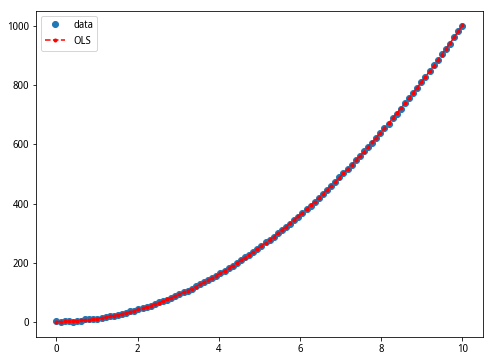

In [46]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

(-0.05, 2, -1, 25)

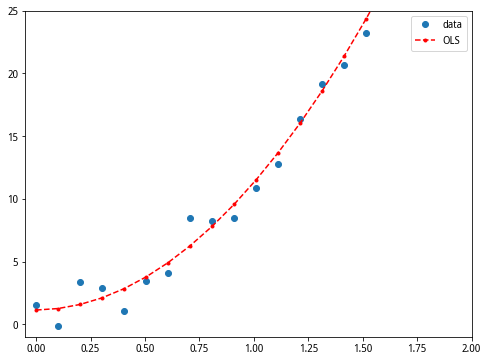

In [47]:
# 放大细节
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
ax.axis((-0.05, 2, -1, 25))

### 简单应用

我们来做一个非常简单的实际应用。设 x 为上证指数的日收益率，y 为深证成指的日收益率。通过对股票市场的认知，我们认为 x 和 y 有很强的线性关系。因此可以假设模型

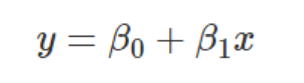

In [51]:
# 我们取上证指数和深证成指一年中的收盘价
x_price = get_price('000001.XSHG', start_date='2015-01-01', end_date='2016-01-01', 
                    frequency='daily', fields=['close'])['close'].values
y_price = get_price('399001.XSHE', start_date='2015-01-01', end_date='2016-01-01', 
                    frequency='daily', fields=['close'])['close'].values

In [53]:
# 计算两个指数一年内的日收益率，记载于 x_pct 和 y_pct 两个 list 中
x_pct, y_pct = [], []
for i in range(1, len(x_price)):
    x_pct.append(x_price[i]/x_price[i-1]-1)
for i in range(1, len(y_price)):
    y_pct.append(y_price[i]/y_price[i-1]-1)

In [54]:
# 将数据转化为 array 的形式；不要忘记添加常数项
x = np.array(x_pct)
X = sm.add_constant(x)
y = np.array(y_pct)

In [55]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1325.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          6.57e-100
Time:                        17:44:09   Log-Likelihood:                 765.13
No. Observations:                 243   AIC:                            -1526.
Df Residuals:                     241   BIC:                            -1519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.327      0.7

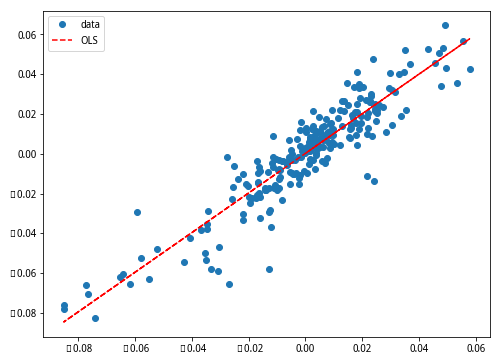

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, results.fittedvalues, 'r--', label="OLS")
ax.legend(loc='best')

https://www.jianshu.com/p/e20fa0879d95

## 二、最优化

### 梯度下降法
梯度下降本身是沿梯度方向变化，对于一些友好的函数我们可以很容易找到最低点，但是对于一些复杂的函数，我们通过梯度下降不一定可以找到最低点。

In [57]:
from scipy import optimize
# 这里的f 可以自定义，这里为了更加直观的演示，使用的是较为简单的函数。
def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - 7)**2
#  梯度下降，这里我们要给出函数变量的初始值。
optimize.fmin_cg(f,[0,0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 32
         Gradient evaluations: 8


array([0.9999999919141427, 6.999999987663085])

In [58]:
# 也可以主动传入函数的梯度(基于每个自变量求偏导)
def fprime(x):
    return np.array((-2*.5*(1 - x[0]), 2*(x[1] - 7)))
optimize.fmin_cg(f, [0, 0], fprime=fprime)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8


array([0.9999999999999999, 7.0])

### 牛顿法

牛顿法的基本思路是，在现有极小点估计值的附近对目标函数做二阶展开，进而找到极小点的下一个估计值。

In [59]:
def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - 7)**2
# 一阶求导
def fprime(x):
    return np.array((-2*.5*(1 - x[0]), 2*(x[1] - 7)))
# 二阶求导
def hessian(x):
    return np.array(-2*.5*x[0], 2*x[1])
# 最少需要传入一阶导
optimize.fmin_ncg(f,[200,800],fprime=fprime)
optimize.fmin_ncg(f,[200,800],fprime=fprime, fhess=hessian)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 32
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 68
         Gradient evaluations: 105
         Hessian evaluations: 38


array([1.0, 7.000000003802888])

### 拟牛顿法
BFGS: BFGS (Broyden-Fletcher-Goldfarb-Shanno算法) 改进了每一步对Hessian的近似。在一些正常的函数中，BFGS 虽然不如牛顿法快，但是还是比较快的。而且对于一些情况复杂的函数，BFGS 要比牛顿法好，因为它对 Hessian 进行了改进。

In [60]:
def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - 7)**2
# 一阶求导
def fprime(x):
    return np.array((-2*.5*(1 - x[0]), 2*(x[1] - 7)))
optimize.fmin_bfgs(f,[200,800],fprime=fprime)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9


array([1.0000003503948267, 6.999999953447061])

L-BFGS: 限制内存的 BFGS 介于 BFGS 和梯度之间: 在非常高的维度 (> 250) 计算和翻转的Hessian矩阵的成本非常高。L-BFGS保留了低秩的版本。并且在这种情况下可以不为 L-BFGS 求解器传入梯度，添加 approx_grad = 1 即可。

In [63]:
optimize.fmin_l_bfgs_b(f,[200,800],approx_grad=1)

(array([0.999999996595188, 7.000000003173628]),
 1.586828437177446e-17,
 {'grad': array([1.5951879720119495e-09, 1.6347255005781383e-08]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 27,
  'nit': 5,
  'warnflag': 0})

In [64]:
optimize.fmin_l_bfgs_b(f,[200,800],fprime=fprime)

(array([1.0000000017863901, 7.00000000910477]),
 8.449243656712068e-17,
 {'grad': array([1.786390146918393e-09, 1.820954054210233e-08]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 9,
  'nit': 5,
  'warnflag': 0})

### Powell 算法

和梯度下降类似的方法

In [65]:
def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - 7)**2
# 一阶求导
def fprime(x):
    return np.array((-2*.5*(1 - x[0]), 2*(x[1] - 7)))
optimize.fmin_powell(f,[0,0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 36


array([1.0, 6.9999999999999964])

### Nelder-Mead 算法

对噪音很强壮，他不依赖于计算梯度。因此，它可以在局部光滑的函数上工作。但是，它在光滑、非噪音函数上比基于梯度的方法慢。

In [66]:
def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - 7)**2
# 一阶求导
def fprime(x):
    return np.array((-2*.5*(1 - x[0]), 2*(x[1] - 7)))
optimize.fmin(f, [2, 2])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 93


array([0.999997964319626, 6.999959750679565])

带有限制条件的优化
更多的情况，我们需要关注的不仅仅是目标函数，同时还会对变量有一定的限制条件，下面分别介绍了三种限制条件：边界限制、等于限制、大于(小于)限制。

### 边界限制

最优解不会出现在指定边界以外的位置，即在指定边界内寻找最优解

In [67]:
def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - 7)**2
# 一阶求导
def fprime(x):
    return np.array((-2*.5*(1 - x[0]), 2*(x[1] - 7)))
# 这里限制了 x[0] 的取值在(1,2), x[1] 的取值在(9,19)
optimize.fmin_l_bfgs_b(f, [0,0], approx_grad=1, bounds=((1,2),(9,19)))

(array([1.0, 9.0]),
 4.0,
 {'grad': array([0.0, 4.000000330961484]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 3,
  'nit': 0,
  'warnflag': 0})

### 等于限制

最优解会满足等于限制条件，即在指定等于限制条件内寻找最优解。

In [68]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)
# 自定义限制条件
def constraint(x):
    return x[0]+x[1] - 4
#   eqcons == 0.0 
optimize.fmin_slsqp(f, np.array([0, 0]), eqcons=[constraint,])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.7071067813854752
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([2.500011860154142, 1.4999881398458583])

### 大于限制

最优解会满足大于限制条件，即在大于限制条件内寻找最优解。

In [69]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)
# 自定义限制条件
def constraint(x):
    return x[0]+x[1] - 4
#   eqcons >= 0.0 
optimize.fmin_slsqp(f, np.array([0, 0]), ieqcons=[constraint,])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.634138291391657e-06
            Iterations: 21
            Function evaluations: 102
            Gradient evaluations: 21


array([2.9999996522178796, 1.9999973889212699])

## 三 求导

https://blog.csdn.net/dontla/article/details/106201901

SymPy是一个符号计算的Python库。它的目标是成为一个全功能的计算机代数系统，同时保持代码简洁、易于理解和扩展。它完全由Python写成，不依赖于外部库。

SymPy支持符号计算、高精度计算、模式匹配、绘图、解方程、微积分、组合数学、离散数学、几何学、概率与统计、物理学等方面的功能。


In [ ]:
from sympy import symbols, diff

In [78]:
# 求已定义函数的导数/偏导
def f(a, b):
    return a ** 2 + b ** 3

x, y = symbols('x y', real=True)
print(diff(f(x, y), x))  # 2*x

2*x


In [77]:
# 直接代入函数式求导数/偏导
x, y = symbols('x y', real=True)
print(diff(x ** 2 + y ** 3, y))

3*y**2


In [76]:
# 用subs()函数求指定位置的导数/偏导值
x, y = symbols('x y', real=True)
print(diff(x ** 2 + y ** 3, y).subs({x: 3, y: 1}))  # 3

3


In [83]:
from scipy.misc import derivative
def f(x):
    return x**5
# 一阶导数
for x in range(1, 4):
    print(derivative(f, x, dx=1e-6))

4.999999999866223
80.00000000230045
405.00000005749826


In [82]:
# 二阶导数
for x in range(1, 4):
    print(derivative(f, x, dx=1e-6, n = 2))

19.999335520992645
160.02132952053216
540.0124791776761


In [ ]:

p = np.poly1d([1,2,0,3,0,5])
print(p)
for i in range(1, 4):
    print(np.polyder(p,i))
    print(np.polyder(p,i)(1.0))

for i in range(1, 4):
    print(p.deriv(i)
    print(p.deriv(i)(1.0)